In [135]:
import pandas as pd               #For data loading and data manipulation
import seaborn as sns             #For data visualization 
import matplotlib.pyplot as plt   #For data visualization
%matplotlib inline
import re

import nltk
from nltk.corpus import stopwords #For stopword removals

import string                     #For Punctuations

import numpy as np

In [136]:
# Display.max_colwidth option  set to None to show all text content without truncation
pd.set_option('display.max_colwidth', None)
# Your code to read the DataFrame
df1 = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')
df=pd.concat([df1,test_df])

In [137]:
df.head(10)

,lang_id,text,index
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,NaN
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,NaN
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months,NaN
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,NaN
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,NaN
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga di tla lebelela diphetogo tša mebaraka ya mešomo le mekgwa ga mmogo le go thapiwa mešomong ka makaleng ao mešomo ao lego molaong le ao a sego molaong le go hloka me omo,NaN
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tshekong go ya ka temana ya a e tshwanetse kwa ntle ga fa kgetse e tsholotswe kgotsa e fetiseditswe kwa kgotlatshekelo ya bana ya fetisediwa kwa kgotlatshekelo ya bosiamisi ya ngwana gore a ikarabele mo tatofatsong le go sekiwa ga kgetse go ya ka kgaolo ya,NaN
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele apo a khothe ya madzhisitirata lihoro line la si vhe na mulandu li do vha lone line la wana masheleni ngeno lihoro le la wanwa mulandu li tshi do vha lone line la tea u lifha ayo masheleni o laelwaho nga khothe,NaN
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le mongwe go tonakgolo le go thteramelao ya profense malebana le taolo ya dipotfolio tša bona mme maloko a mangwe ka moka a khuduthamaga le wona bjalo a ikrabela ka seboka mabapi le phethagatšo ya mediro ya mmušo wa profense le go merero ya wona,NaN
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha lesedi le le benyabenyang le le bogale jo bo dirang gore le kgone go bonwa ke motho yo o bonang sentle mo leseding le le tlwaelegileng mo sekgaleng sa dimitara di le,NaN


In [138]:
df.shape

(38682, 3)

In [139]:
df.info() #checking the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38682 entries, 0 to 5681
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lang_id  33000 non-null  object 
 1   text     38682 non-null  object 
 2   index    5682 non-null   float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


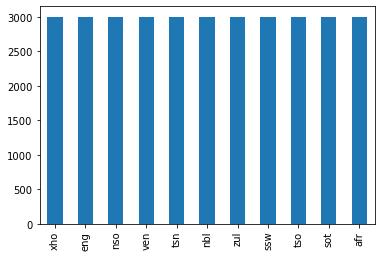

In [140]:
#Plot a barg graph to show the distribution of the sentiments
df['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

In [141]:
df.isnull().sum()

lang_id     5682
text           0
index      33000
dtype: int64

CHECK FOR DIFFERENT TARGET LABELS

In [142]:
df['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [144]:
DATA PREPROCESSING

REMOVING OF STOP WORDS

SyntaxError: invalid syntax (3058242454.py, line 1)

In [145]:
df_train = df.copy() #Let us make a copy of our dataframe to avoid modifying the original dataframe

In [146]:
#To get a list of english stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [147]:
 clean_texts = []

for text in df_train['text']:
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    clean_text = ' '.join(filtered_words)
    clean_texts.append(clean_text)

# clean_texts
df_train['clean_text'] = clean_texts
df_train.head()

,lang_id,text,index,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,NaN,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,NaN,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months,NaN,province kwazulu-natal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,NaN,netefatša gore ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri magolo šomišwago go fihlelela meagong e metelele scaffolds bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,NaN,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


REMOVE URLS

In [148]:
#Remove urls and replace with 'url'
 
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'

subs_url = r'url'

df_train['clean_text'] = df_train['clean_text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [149]:
df_train['clean_text'].iloc[2]

'province kwazulu-natal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months'

REMOVE PUNCTUATIONS

In [150]:
#Convert text to lower case
df_train['clean_text'] = df_train['clean_text'].str.lower()

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [151]:
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])


df_train['clean_text'] = df_train['clean_text'].apply(remove_punctuation)
df_train['clean_text'].iloc[9]

'fa le dirisiwa lebone le tshwanetse go bontsha lesedi le le benyabenyang le le bogale jo bo dirang gore le kgone go bonwa ke motho yo bonang sentle mo leseding le le tlwaelegileng mo sekgaleng sa dimitara di le'

In [103]:
df_train['clean_text'].iloc[2]

'province kwazulunatal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months'

Despite removing puntuations, we still observe some curly quotation marks and repeated punctuations.

Let's deal with these using regular expression(regex)

In [104]:
def clean_text(text):
    text = re.sub(r'[^\w\s"“”]', '', text)  # Remove non-alphanumeric characters and curly quotation marks
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'([!?.])\1+', r'\1', text)  # Remove repeated punctuation marks
    return text.strip()

# Apply the clean_text function to the 'message' column
df_train['clean_text'] = df_train['clean_text'].apply(clean_text)
df_train['clean_text'].iloc[2]

'province kwazulunatal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months'

In [105]:
df_train['clean_text'].iloc[9]

'fa le dirisiwa lebone le tshwanetse go bontsha lesedi le le benyabenyang le le bogale jo bo dirang gore le kgone go bonwa ke motho yo bonang sentle mo leseding le le tlwaelegileng mo sekgaleng sa dimitara di le'

In [106]:
df_train.shape

(38682, 4)

In [107]:
df_train=df_train.drop(["text"],axis=1)

In [108]:
df_train.head()

,lang_id,index,clean_text
0,xho,NaN,umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,NaN,idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,NaN,province kwazulunatal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months
3,nso,NaN,netefatša gore ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri magolo šomišwago go fihlelela meagong e metelele scaffolds bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,NaN,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


COUNTS VECTORIZER

In [152]:
from sklearn.feature_extraction.text import CountVectorizer

In [153]:
vect = CountVectorizer()
vect.fit(df_train['clean_text'])

CountVectorizer()

In [154]:
df_train.head()

,lang_id,text,index,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,NaN,umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,NaN,idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months,NaN,province kwazulunatal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,NaN,netefatša gore ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri magolo šomišwago go fihlelela meagong e metelele scaffolds bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,NaN,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [155]:
vect = CountVectorizer(stop_words='english')

In [156]:
vect = CountVectorizer(ngram_range=(1, 2))

In [157]:
vect = CountVectorizer(max_df=0.5)

In [158]:
vect = CountVectorizer(min_df=2)

In [159]:
betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))

In [160]:
df_new=betterVect.fit_transform(df_train['clean_text'])

In [161]:
betterVect

CountVectorizer(max_df=0.5, min_df=2, stop_words='english')

In [162]:
df_train

,lang_id,text,index,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,NaN,umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,NaN,idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months,NaN,province kwazulunatal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,NaN,netefatša gore ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri magolo šomišwago go fihlelela meagong e metelele scaffolds bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,NaN,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso
...,...,...,...,...
5677,NaN,You mark your ballot in private.,5678.0,mark ballot private
5678,NaN,"Ge o ka kgetha ka bowena go se šomiše Mofani ka tirelo yo a kgethilwego wa GEMS (DSP), gona tefelo mmogo e tla šomišwa. Tefelo mmogo yeo e ka nna ya ba phapano magareng ga hlwahlwa ya tirelo le yeo GEMS e ka bego e e lefeletše ge nkabe o šomišitše GEMS DSP Goba persente ya tefelo mmogo go ya ka Melao ya Setlamo ya GEMS.",5679.0,ge ka kgetha ka bowena go se šomiše mofani ka tirelo yo kgethilwego wa gems dsp gona tefelo mmogo e tla šomišwa tefelo mmogo yeo e ka nna ya ba phapano magareng ga hlwahlwa ya tirelo le yeo gems e ka bego e e lefeletše ge nkabe šomišitše gems dsp goba persente ya tefelo mmogo go ya ka melao ya setlamo ya gems
5679,NaN,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ha o na ho kgona ho fetola kgetho ena hara selemo ntle le tumello ya Boto ya Batshwaredi.",5680.0,e ka kopo etsa kgetho ya hao ka hloko hobane ha na ho kgona ho fetola kgetho ena hara selemo ntle le tumello ya boto ya batshwaredi
5680,NaN,"TB ke bokudi ba PMB, mme Morero o tla lefella tlhahlobo ya ho sheba lefu lena. Leha ho le jwalo, o tlameha ho fumana kalafo ya hao ya TB ditsing tsa Mmuso.",5681.0,tb ke bokudi ba pmb mme morero tla lefella tlhahlobo ya ho sheba lefu lena leha ho le jwalo tlameha ho fumana kalafo ya hao ya tb ditsing tsa mmuso


In [163]:
print(df_new)

  (0, 59885)	1
  (0, 64148)	1
  (0, 2231)	1
  (0, 25827)	1
  (0, 3775)	1
  (0, 59652)	1
  (0, 34308)	1
  (0, 26398)	1
  (0, 43936)	1
  (0, 20938)	1
  (0, 27213)	1
  (0, 14828)	1
  (0, 67964)	1
  (0, 47470)	1
  (0, 28487)	1
  (0, 67440)	1
  (0, 19508)	2
  (0, 66937)	1
  (0, 42595)	1
  (0, 65469)	1
  (0, 45822)	1
  (0, 33441)	1
  (0, 1355)	1
  (1, 26398)	1
  (1, 18848)	2
  :	:
  (38680, 56082)	1
  (38680, 36634)	1
  (38680, 23009)	1
  (38680, 18202)	3
  (38680, 56896)	1
  (38680, 36677)	1
  (38680, 17484)	1
  (38680, 37253)	1
  (38680, 51623)	1
  (38680, 22545)	1
  (38680, 56124)	1
  (38680, 54338)	2
  (38680, 56247)	1
  (38680, 30078)	1
  (38680, 30674)	1
  (38680, 47980)	1
  (38680, 30033)	1
  (38680, 16317)	1
  (38680, 22680)	1
  (38680, 6740)	1
  (38680, 29993)	1
  (38680, 10261)	1
  (38681, 66332)	1
  (38681, 61551)	1
  (38681, 27009)	1


In [164]:
df["lang_id"].values

array(['xho', 'xho', 'eng', ..., nan, nan, nan], dtype=object)

In [165]:
y=df_train[:len(df1)][["lang_id"]]
y

,lang_id
0,xho
1,xho
2,eng
3,nso
4,ven
...,...
32995,tsn
32996,sot
32997,eng
32998,xho


In [166]:
X_train=df_new[:len(df1)]
print(X_train)

  (0, 59885)	1
  (0, 64148)	1
  (0, 2231)	1
  (0, 25827)	1
  (0, 3775)	1
  (0, 59652)	1
  (0, 34308)	1
  (0, 26398)	1
  (0, 43936)	1
  (0, 20938)	1
  (0, 27213)	1
  (0, 14828)	1
  (0, 67964)	1
  (0, 47470)	1
  (0, 28487)	1
  (0, 67440)	1
  (0, 19508)	2
  (0, 66937)	1
  (0, 42595)	1
  (0, 65469)	1
  (0, 45822)	1
  (0, 33441)	1
  (0, 1355)	1
  (1, 26398)	1
  (1, 18848)	2
  :	:
  (32998, 13091)	1
  (32998, 58601)	1
  (32999, 29681)	1
  (32999, 65303)	1
  (32999, 63168)	1
  (32999, 36039)	1
  (32999, 23009)	1
  (32999, 18202)	3
  (32999, 56896)	3
  (32999, 29559)	1
  (32999, 13457)	1
  (32999, 9916)	1
  (32999, 34597)	1
  (32999, 32696)	2
  (32999, 14433)	1
  (32999, 24438)	1
  (32999, 29972)	1
  (32999, 35056)	1
  (32999, 46020)	2
  (32999, 9504)	1
  (32999, 66804)	1
  (32999, 55532)	1
  (32999, 17852)	1
  (32999, 39813)	1
  (32999, 10083)	1


In [167]:
y["lang_id"].values

array(['xho', 'xho', 'eng', ..., 'eng', 'xho', 'sot'], dtype=object)

In [168]:
X_TEST=df_new[len(df1):]

Now our parameters are y,X_train,X_TEST

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y["lang_id"].values, test_size=0.2, random_state=42)

DATA NORMALIZATION

TOKENIZATION

In [171]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['clean_text'].apply(tokeniser.tokenize)

In [172]:
df_train['tokens'].iloc[2]

['province',
 'kwazulunatal',
 'department',
 'transport',
 'invites',
 'tenders',
 'established',
 'contractors',
 'experienced',
 'bridge',
 'construction',
 'construction',
 'kwajolwayo',
 'tugela',
 'river',
 'pedestrian',
 'bridge',
 'near',
 'tugela',
 'ferry',
 'duration',
 'project',
 'months']

SCALING

In [173]:
df_train.head()

,lang_id,text,index,clean_text,tokens
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,NaN,umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,"[umgaqosiseko, wenza, amalungiselelo, kumaziko, axhasa, ulawulo, lwesininzi, kunye, nokuthath, inxaxheba, kwabafazi, ezi, ziquka, phakathi, kwezinye, zazo, ikomishoni, yokulingana, ngokwesini, ikomishoni, yamalungelo, oluntu, lomzantsi, afrika]"
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,NaN,idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo,"[idha, iya, kuba, nobulumko, bokubeka, umsebenzi, naphi, na, kwisebe, ngokusekwe, kwiimfuno, zokusebenza, zalo, emva, kokubonana, nomsebenzi, kunye, okanye, imanyano, yakhe, ukuba, ulandulo, lomntu, onjalo, alufanelekanga, idha, mayibize, uncedo, olufanelekileyo, elungelweni, layo]"
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months,NaN,province kwazulunatal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months,"[province, kwazulunatal, department, transport, invites, tenders, established, contractors, experienced, bridge, construction, construction, kwajolwayo, tugela, river, pedestrian, bridge, near, tugela, ferry, duration, project, months]"
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,NaN,netefatša gore ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri magolo šomišwago go fihlelela meagong e metelele scaffolds bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,"[netefatša, gore, ba, file, dilo, ka, moka, tše, le, dumelelanego, ka, tšona, mohlala, maleri, magolo, šomišwago, go, fihlelela, meagong, e, metelele, scaffolds, bolokegilego, lefelo, la, maleba, la, go, šomela, go, phela, gabotse, bjbj]"
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,NaN,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ewa, maana, u, ya, nga, mulayo, wa, khomishini, ya, ndinganyiso, ya, mbeu, u, thetshelesa, mbilaelo, dzine, dza, tshimbilelana, na, tshialula, u, ya, nga, mbeu, nahone, ivhea, sa, foramu, ya, thungo, u, ya, nga, mulayo, wa, ndinganyiso]"


In [ ]:
SUPPORT VECTOR MACHINE

In [174]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.9942424242424243


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.99      0.98      0.99       583
         nso       1.00      0.99      0.99       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       0.99      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      0.99      0.99       609
         zul       0.97      0.99      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



SAVING AS CSV 

In [177]:
results=svc.predict(X_test)

In [178]:
DAF= pd.DataFrame(results,columns=['lang_id'])
DAF.head()

,lang_id
0,sot
1,nso
2,eng
3,nso
4,nso


In [180]:
output= pd.DataFrame({'index':test_df['index']})
submission=output.join(DAF)
submission.head()

,index,lang_id
0,1,sot
1,2,nso
2,3,eng
3,4,nso
4,5,nso


In [182]:
submission.to_csv('Lang_kaggle.csv',index=False)